###
# pySuStaIn: a Python implementation of the Subtype and Stage Inference (SuStaIn) algorithm
#
# If you use pySuStaIn, please cite the following core papers:
# 1. The original SuStaIn paper:    https://doi.org/10.1038/s41467-018-05892-0
# 2. The pySuStaIn software paper:  https://doi.org/10.1016/j.softx.2021.100811

# Please also cite the corresponding progression pattern model you use:
# 1. The piece-wise linear z-score model (i.e. ZscoreSustain):  https://do i.org/10.1038/s41467-018-05892-0
# 2. The event-based model (i.e. MixtureSustain):               https://doi.org/10.1016/j.neuroimage.2012.01.062
#    with Gaussian mixture modeling (i.e. 'mixture_gmm'):       https://doi.org/10.1093/brain/awu176
#    or kernel density estimation (i.e. 'mixture_kde'):         https://doi.org/10.1002/alz.12083
# 3. The model for discrete ordinal data (i.e. OrdinalSustain): https://doi.org/10.3389/frai.2021.613261
#
# Thanks a lot for supporting this project.
#
# Authors:      Peter Wijeratne (p.wijeratne@ucl.ac.uk) and Leon Aksman (leon.aksman@loni.usc.edu)
# Contributors: Arman Eshaghi (a.eshaghi@ucl.ac.uk), Alex Young (alexandra.young@kcl.ac.uk), Cameron Shand (c.shand@ucl.ac.uk)
###

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv',sep=';')

In [ ]:
df

In [ ]:
# Group by 'Visit' and calculate percentage of missing values per column
missing_percent_by_visit = (
    df.groupby('EVENT_ID')
      .apply(lambda g: g.isnull().mean() * 100)
      .round(2)
)

In [ ]:
missing_percent_by_visit

In [ ]:
missing_percent_by_visit.to_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/missing_precentage_per_visit.csv')

In [ ]:
required_visits = ["V04", "V06", "V08"]
cog_cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT"]
selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + cog_cols + ["EVENT_ID"]


In [ ]:
df = df[df["EVENT_ID"].isin(required_visits)][selected_columns]

In [ ]:
df_prod_pd = df[df["COHORT"].isin(["PD", "Prodromal"])]

In [ ]:
# import the python packages needed to generate simulated data for the tutorial
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import sklearn.model_selection
import pandas as pd
import pylab
import sys
import pySuStaIn

# this needs to point to wherever the sim folder inside pySuStaIn is on your computer
#sys.path.insert(0,'/Users/alexandrayoung/Documents/Code/pySuStaIn-test/pySuStaIn/sim/')
# if you're running the notebook from within the existing structure you can use
sys.path.insert(0,'../sim/')
from simfuncs import generate_random_Zscore_sustain_model, generate_data_Zscore_sustain

In [ ]:
df_control = df[df["COHORT"].isin(["Healthy Control"])]

In [ ]:
# Step 4: Drop any PATNO who has missing values in any of those columns
def is_patient_valid(group):
    return (len(group) == 3) and (not group[cog_cols].isnull().any().any())

df_control = df_control.groupby("PATNO").filter(is_patient_valid)


In [ ]:
df_control

In [ ]:
df_prod_pd = df_prod_pd.groupby("PATNO").filter(is_patient_valid)


In [ ]:
df_prod_pd

In [ ]:
df_control_selected=  df_control[["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT"]]

In [ ]:
df_control_selected

In [ ]:
df_pd_prod_selected=df_prod_pd[["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT"]]

In [ ]:
# extract data for control subjects


# compute the mean and standard deviation of the control population
mean_control = np.mean(df_control_selected,axis=0)
std_control = np.std(df_control_selected,axis=0)

# z-score the data
data = (df_pd_prod_selected-mean_control)/std_control
data_control = (df_control_selected-mean_control)/std_control

# multiply data for decreasing biomarkers by -1
#is_decreasing = np.mean(data,axis=0)<np.mean(data_control,axis=0)
#data.loc[:, is_decreasing] = data.loc[:, is_decreasing] * -1

# For data_control
#data_control.loc[:, is_decreasing] = data_control.loc[:, is_decreasing] * -1

# Check that the mean of the control population is 0
#print('Mean of controls is ',np.mean(data_control,axis=0))
# Check that the standard deviation of the control population is 1
#print('Standard deviation of controls is ',np.std(data_control,axis=0))
# Check that the mean of the whole dataset is positive
#print('Mean of whole dataset is ',np.mean(data,axis=0))
# Check that the standard deviation of the whole dataset is greater than 1
#print('Standard deviation of whole dataset is ',np.std(data,axis=0))

In [ ]:
mean_control

In [ ]:
std_control

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT"]

for col in cols:
    df_mean = df_prod_pd.groupby('EVENT_ID', as_index=False)[col].mean()
    
    sns.lineplot(data=df_mean, x='EVENT_ID', y=col)
    plt.title(f"Average {col} Across Visits")
    plt.xlabel("Visit (EVENT_ID)")
    plt.ylabel(f"Average {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
Vérification des intervalles
Formule pour valeur de dépression

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT"]

for col in cols:
    df_mean = df_control.groupby('EVENT_ID', as_index=False)[col].mean()
    
    sns.lineplot(data=df_mean, x='EVENT_ID', y=col)
    plt.title(f"Average {col} Across Visits")
    plt.xlabel("Visit (EVENT_ID)")
    plt.ylabel(f"Average {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Zmax selection


In [ ]:
cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT"]
percentiles_95 = data[cols].quantile(0.95)
print("95th percentiles:")
print(percentiles_95)

In [ ]:
percentiles_95

In [ ]:
columns = data.columns.tolist()

In [ ]:
data

In [ ]:
columns

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_median_zscores(data):
    """
    Plots median and IQR for each biomarker in z-scored data.
    """
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=[f"Biomarker {i+1}" for i in range(data.shape[1])])

    medians = data.median()
    q25 = data.quantile(0.1)
    q75 = data.quantile(0.99)

    plt.figure(figsize=(10, 5))
    plt.plot(medians.index, medians.values, marker='o', label='Median z-score')
    plt.fill_between(medians.index, q25, q75, alpha=0.2, label='IQR (25–75%)')

    plt.axhline(1, color='gray', linestyle='--', label='Z=1')
    plt.axhline(2, color='gray', linestyle='--', label='Z=2')
    plt.axhline(3, color='gray', linestyle='--', label='Z=3')

    plt.xticks(rotation=45)
    plt.ylabel("Z-score")
    plt.title("Median Z-scores with IQR per Biomarker")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_median_zscores(data)

## To be tweaked

In [ ]:
Z_vals = np.array([
    [0, 1, 2, 0, 0, 0],
    [1, 2, 4, 5, 6, 0],
    [1, 2, 4, 5, 6, 7]
])
Z_max = np.array([2, 6, 7])

In [ ]:
df_pd_prod_selected=df_prod_pd[["NP1RTOT", "NP2PTOT", "NP3TOT"]]

In [ ]:
# extract data for control subjects


# compute the mean and standard deviation of the control population
mean_control = np.mean(df_control_selected,axis=0)
std_control = np.std(df_control_selected,axis=0)

# z-score the data
data = (df_pd_prod_selected-mean_control)/std_control
data_control = (df_control_selected-mean_control)/std_control

# multiply data for decreasing biomarkers by -1
#is_decreasing = np.mean(data,axis=0)<np.mean(data_control,axis=0)
#data.loc[:, is_decreasing] = data.loc[:, is_decreasing] * -1

# For data_control
#data_control.loc[:, is_decreasing] = data_control.loc[:, is_decreasing] * -1

# Check that the mean of the control population is 0
#print('Mean of controls is ',np.mean(data_control,axis=0))
# Check that the standard deviation of the control population is 1
#print('Standard deviation of controls is ',np.std(data_control,axis=0))
# Check that the mean of the whole dataset is positive
#print('Mean of whole dataset is ',np.mean(data,axis=0))
# Check that the standard deviation of the whole dataset is greater than 1
#print('Standard deviation of whole dataset is ',np.std(data,axis=0))

In [ ]:
data

In [ ]:
data=data.drop(columns=["AGE_AT_VISIT", "MCATOT"])

In [ ]:
# Remove rows with NaN
data = data.dropna()

# Remove rows with any negative values
data=data[(data >= 0).all(axis=1)]

In [ ]:
SuStaInLabels = data.columns.tolist()

In [ ]:
data = data.to_numpy() 

In [ ]:
SuStaInLabels

Run the model after that refer to feature selection

In [ ]:
# Input the settings for z-score SuStaIn
# To make the tutorial run faster I've set 
# N_startpoints = 10 and N_iterations_MCMC = int(1e4)
# I recommend using N_startpoints = 25 and 
# N_iterations_MCMC = int(1e5) or int(1e6) in general though
N_startpoints = 25
N_S_max = 2
N_iterations_MCMC = int(1e4)
output_folder = os.path.join(os.getcwd(), 'sim')
dataset_name = 'ppmi'
sustain_input = pySuStaIn.ZscoreSustain(data,
                              Z_vals,
                              Z_max,
                              SuStaInLabels,
                              N_startpoints,
                              N_S_max, 
                              N_iterations_MCMC, 
                              output_folder, 
                              dataset_name, 
                              False)

Deleting previous SuStaIn results if necessary

In [ ]:
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
# output_folder = os.path.join(os.getcwd(), 'sim2')    
# dataset_name = 'sim2' 
# sustain_input = ZscoreSustain(data,
#                               Z_vals,
#                               Z_max,
#                               SuStaInLabels,
#                               N_startpoints,
#                               N_S_max, 
#                               N_iterations_MCMC, 
#                               output_folder, 
#                               dataset_name, 
#                               False)

Create folder for results if it dosen't exist already

In [ ]:
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

Running the SuStaIn algorithm

In [ ]:
import os
print(os.path.exists('C:\\Users\\nss_1\\Desktop\\SustalIn\\pySuStaIn\\notebooks\\sim'))

In [ ]:
import os
print(os.getcwd())

In [ ]:
# runs the sustain algorithm with the inputs set in sustain_input above
samples_sequence,   \
samples_f,          \
ml_subtype,         \
prob_ml_subtype,    \
ml_stage,           \
prob_ml_stage,      \
prob_subtype_stage  = sustain_input.run_sustain_algorithm()# Load SuStaIn inference results


In [ ]:
M=len(data)

In [ ]:
print("Z_vals shape:", Z_vals.shape)  # should be (n_biomarkers, n_zscores)
print("Expected events:", Z_vals.shape[0] * Z_vals.shape[1])
print("zvalues length:", len(Z_vals))
print("colour_mat shape:", colour_mat.shape)


In [ ]:
print("Z_vals shape:", Z_vals.shape)  # Expect (n_biomarkers, n_zscore_levels)
n_events = Z_vals.shape[0] * Z_vals.shape[1]
print("Expected number of z-score events (n_events):", n_events)

In [ ]:
zvalues = Z_vals.flatten(order='F')

In [ ]:
zvalues

# After Adding more Continious Variables

In [ ]:


# The code below opens the results for the ground truth number of subtypes
# and plots the output
s = 1
pickle_filename_s           = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
pickle_filepath             = Path(pickle_filename_s)
pickle_file                 = open(pickle_filename_s, 'rb')
loaded_variables            = pickle.load(pickle_file)
samples_sequence            = loaded_variables["samples_sequence"]
samples_f                   = loaded_variables["samples_f"]
pickle_file.close()

pySuStaIn.ZscoreSustain._plot_sustain_model(sustain_input,samples_sequence,samples_f,M,subtype_order=(0,1))
_ = plt.suptitle('Figure 10: SuStaIn output')


sustain_input.combine_cross_validated_sequences(N_S_gt, N_folds)
_ = plt.suptitle('Figure 11: Cross-validated SuStaIn output')


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path
import pySuStaIn

# Load data
df = pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv', sep=';')

# Define STAI items
state_items = [f'STAIAD{i}' for i in range(1, 21)]
trait_items = [f'STAIAD{i}' for i in range(21, 41)]
reverse_scored_items = ['STAIAD1', 'STAIAD2', 'STAIAD5', 'STAIAD8', 'STAIAD10',
                        'STAIAD11', 'STAIAD15', 'STAIAD16', 'STAIAD19', 'STAIAD20',
                        'STAIAD21', 'STAIAD23', 'STAIAD26', 'STAIAD27', 'STAIAD30',
                        'STAIAD33', 'STAIAD34', 'STAIAD36', 'STAIAD39', 'STAIAD40']
for col in reverse_scored_items:
    df[col] = 5 - df[col]

# Compute STAI scores
df['STAI_State_Anxiety'] = df[state_items].sum(axis=1)
df['STAI_Trait_Anxiety'] = df[trait_items].sum(axis=1)

# GDS scoring
gds_columns = ['GDSAFRAD', 'GDSALIVE', 'GDSBETER', 'GDSBORED', 'GDSDROPD',
               'GDSEMPTY', 'GDSENRGY', 'GDSGSPIR', 'GDSHAPPY', 'GDSHLPLS',
               'GDSHOME', 'GDSHOPLS', 'GDSMEMRY', 'GDSSATIS', 'GDSWRTLS']
gds_reverse_scored_items = ['GDSAFRAD', 'GDSHAPPY', 'GDSSATIS']
for col in gds_reverse_scored_items:
    df[col] = 1 - df[col]
df['GDS_Total_Score'] = df[gds_columns].sum(axis=1)

# Filter visits and select columns
required_visits = ["V04", "V06", "V08"]
cog_cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT", "STAI_State_Anxiety", "STAI_Trait_Anxiety", "GDS_Total_Score", "MSEADLG"]
selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + cog_cols + ["EVENT_ID"]
df = df[df["EVENT_ID"].isin(required_visits)][selected_columns]

# Subset cohorts
df_control = df[df["COHORT"] == "Healthy Control"]
df_prod_pd = df[df["COHORT"].isin(["PD", "Prodromal"])]

# Drop patients with missing values and incomplete visits
def is_patient_valid(group):
    return (len(group) == 3) and (not group[cog_cols].isnull().any().any())
df_control = df_control.groupby("PATNO").filter(is_patient_valid)
df_prod_pd = df_prod_pd.groupby("PATNO").filter(is_patient_valid)

# Select cognitive features
features = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT", "AGE_AT_VISIT", "STAI_State_Anxiety", "STAI_Trait_Anxiety", "GDS_Total_Score", "MSEADLG"]
df_control_selected = df_control[features]
df_pd_prod_selected = df_prod_pd[features]

# Z-score transformation using control group
mean_control = np.mean(df_control_selected, axis=0)
std_control = np.std(df_control_selected, axis=0)
data = (df_pd_prod_selected - mean_control) / std_control
data_control = (df_control_selected - mean_control) / std_control

# Invert specific columns where higher is better (e.g., functional ability)
columns_to_invert = ["MSEADLG"]
data[columns_to_invert] = data[columns_to_invert] * -1

# Drop unused columns BEFORE removing rows with negative values
data = data.drop(columns=["STAI_State_Anxiety", "STAI_Trait_Anxiety", "MCATOT"])

# Remove patients (rows) that have any negative values
data = data[(data >= 0).all(axis=1)]

# Set SuStaIn parameters
Z_vals = np.array([
    [0, 1, 2, 4, 7, 0],
    [0, 1, 4, 11, 18, 22],
    [0, 1, 4, 8, 12, 14],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 4, 7, 0, 0],
    [0, 3, 7, 15, 0, 0]
])
Z_max = np.array([23, 62, 24, 3, 13, 64])
SuStaInLabels = data.columns.tolist()
data_np = data.to_numpy()

# Initialize SuStaIn model
N_startpoints = 25
N_S_max = 6
N_iterations_MCMC = int(1e4)
output_folder = os.path.join(os.getcwd(), 'sim')
dataset_name = 'ppmi'

sustain_input = pySuStaIn.ZscoreSustain(
    data_np,
    Z_vals,
    Z_max,
    SuStaInLabels,
    N_startpoints,
    N_S_max,
    N_iterations_MCMC,
    output_folder,
    dataset_name,
    False
)

# Run SuStaIn algorithm
(samples_sequence, samples_f, ml_subtype, prob_ml_subtype,
 ml_stage, prob_ml_stage, prob_subtype_stage) = sustain_input.run_sustain_algorithm()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Step 1: Combine control and PD/prodromal data
combined_data = pd.concat([data_control, data], axis=0).reset_index(drop=True)

# Step 2: Create ground truth labels (0 = control, 1 = PD)
gt_stages = np.concatenate([
    np.zeros(data_control.shape[0], dtype=int),
    np.ones(data.shape[0], dtype=int)
])

# Step 3: Create stratification labels
labels = gt_stages.copy()

# Step 4: Stratified folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_it = cv.split(combined_data, labels)

# Step 5: Collect test indices from combined data
offset = data_control.shape[0]
test_idxs_combined = []
for _, test_idx in cv_it:
    # Adjust test indices to align with only PD data
    fold_indices_in_data = test_idx[test_idx >= offset] - offset
    test_idxs_combined.append(fold_indices_in_data)

# Step 6: Manually test 1–6 subtypes by adjusting n_S_max
CVIC_list = []
loglike_matrix_list = []

for n_subtypes in range(1, 7):
    print(f"\n=== Testing {n_subtypes} subtype(s) ===")
    
    # Set max number of subtypes in sustain_input
    sustain_input.n_S_max = n_subtypes
    
    # Perform cross-validation
    CVIC, loglike_matrix = sustain_input.cross_validate_sustain_model(test_idxs_combined)
    
    # Store results
    CVIC_list.append(CVIC[n_subtypes - 1])  # get value for the current number of subtypes
    loglike_matrix_list.append(loglike_matrix[:, n_subtypes - 1])

# Step 7: Convert results to NumPy arrays
CVIC_array = np.array(CVIC_list)
loglike_matrix_all = np.vstack(loglike_matrix_list).T  # shape: (n_folds, n_subtypes)

# Step 8: Plot CVIC
plt.plot(np.arange(1, 7), CVIC_array, marker='o')
plt.xlabel("Number of Subtypes")
plt.ylabel("CVIC (lower is better)")
plt.title("SuStaIn Model Selection via CVIC")
plt.grid(True)
plt.tight_layout()
plt.show()

# Final output
print("Final CVIC values for subtypes 1–6:", CVIC_array)
print("Final log-likelihood matrix shape:", loglike_matrix_all.shape)


In [ ]:
SuStaInLabels

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","STAI_State_Anxiety","STAI_State_Anxiety","GDS_Total_Score","MSEADLG"]

for col in cols:
    df_mean = df_prod_pd.groupby('EVENT_ID', as_index=False)[col].mean()
    
    sns.lineplot(data=df_mean, x='EVENT_ID', y=col)
    plt.title(f"Average {col} Across Visits")
    plt.xlabel("Visit (EVENT_ID)")
    plt.ylabel(f"Average {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","STAI_State_Anxiety","STAI_State_Anxiety","GDS_Total_Score","MSEADLG"]

for col in cols:
    df_mean = df_control.groupby('EVENT_ID', as_index=False)[col].mean()
    
    sns.lineplot(data=df_mean, x='EVENT_ID', y=col)
    plt.title(f"Average {col} Across Visits")
    plt.xlabel("Visit (EVENT_ID)")
    plt.ylabel(f"Average {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# We think we will proceed with the modelling the monotnous variables

### Multiply -1 decreasing variables

In [ ]:
columns

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_median_zscores(data):
    """
    Plots median and IQR for each biomarker in z-scored data.
    """
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=[f"Biomarker {i+1}" for i in range(data.shape[1])])

    medians = data.median()
    q25 = data.quantile(0.1)
    q75 = data.quantile(0.99)

    plt.figure(figsize=(10, 5))
    plt.plot(medians.index, medians.values, marker='o', label='Median z-score')
    plt.fill_between(medians.index, q25, q75, alpha=0.2, label='IQR (1–99%)')

    plt.axhline(1, color='gray', linestyle='--', label='Z=1')
    plt.axhline(2, color='gray', linestyle='--', label='Z=2')
    plt.axhline(3, color='gray', linestyle='--', label='Z=3')

    plt.xticks(rotation=45)
    plt.ylabel("Z-score")
    plt.title("Median Z-scores with IQR per Biomarker")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_median_zscores(data)

In [ ]:
data=data.drop(columns=["STAI_State_Anxiety", "STAI_Trait_Anxiety","MCATOT"])

### Z_vals is an important parameter to work with SustaIn so we need a medical researcher to assess this parameter : Z_vals are the value that calculates the transition from stage 1 to stage 2 for example

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
data[data < 0] = 0

In [ ]:
# Define desired percentiles
percentiles = [0.1, 0.25, 0.5, 0.75, 0.90,0.95]

# Calculate and print percentiles for each column
for col in data.columns:
    print(f"Column: {col}")
    values = data[col].quantile(percentiles)
    for p, v in zip(percentiles, values):
        print(f"  {int(p*100)}th percentile: {v:.3f}")
    print()

In [ ]:
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
# output_folder = os.path.join(os.getcwd(), 'sim2')    
# dataset_name = 'sim2' 
# sustain_input = ZscoreSustain(data,
#                               Z_vals,
#                               Z_max,
#                               SuStaInLabels,
#                               N_startpoints,
#                               N_S_max, 
#                               N_iterations_MCMC, 
#                               output_folder, 
#                               dataset_name, 
#                               False)

In [ ]:
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

In [ ]:
data

In [ ]:
M= len(data)

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pySuStaIn import ZscoreSustain

# 1) Define your Z-score grid
Z_vals = np.array([
    [0, 1, 2, 4, 7, 0],
    [0, 1, 4,11,15,15],
    [0, 1, 4, 7,11,15],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 4, 7, 0, 0],
    [0, 4, 7,15, 0, 0]
])
Z_max = np.array([23, 62, 24, 3, 13, 64])
s=1
# 2) Load your SuStaIn output (samples_sequence, samples_f, etc.)
with open(output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle', "rb") as f:
    data = pickle.load(f)
samples_sequence = data["samples_sequence"]   # shape (n_subtypes, n_events, n_samples)
samples_f        = data["samples_f"]          # shape (n_subtypes,)
n_samples        = M         # or however you stored M

# 3) Plot using the static method, passing Z_vals by name
figs, axs = ZscoreSustain.plot_positional_var(
    samples_sequence=samples_sequence,
    samples_f=samples_f,
    n_samples=n_samples,
    Z_vals=Z_vals,
    subtype_order=(0, 1),      # or whatever order you prefer
    biomarker_labels=None,     # you can supply your own labels here
    stage_label="SuStaIn Stage",
    title_font_size=12,
    stage_font_size=10,
    label_font_size=10,
    stage_interval=1,
    cmap="original",
    figsize=(10, 4)
)

# 4) Add a suptitle and show
plt.suptitle("Figure 10: SuStaIn output", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pySuStaIn import ZscoreSustain

# 1) Define your Z-score grid
Z_vals = np.array([
    [0, 1, 2, 4, 7, 0],
    [0, 1, 4,11,15,15],
    [0, 1, 4, 7,11,15],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 4, 7, 0, 0],
    [0, 4, 7,15, 0, 0]
])
Z_max = np.array([23, 62, 24, 3, 13, 64])
s=5
# 2) Load your SuStaIn output (samples_sequence, samples_f, etc.)
with open(output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle', "rb") as f:
    data = pickle.load(f)
samples_sequence = data["samples_sequence"]   # shape (n_subtypes, n_events, n_samples)
samples_f        = data["samples_f"]          # shape (n_subtypes,)
n_samples        = M         # or however you stored M

# 3) Plot using the static method, passing Z_vals by name
figs, axs = ZscoreSustain.plot_positional_var(
    samples_sequence=samples_sequence,
    samples_f=samples_f,
    n_samples=n_samples,
    Z_vals=Z_vals,
    subtype_order=tuple(range(6)),      # or whatever order you prefer
    biomarker_labels=None,     # you can supply your own labels here
    stage_label="SuStaIn Stage",
    title_font_size=12,
    stage_font_size=10,
    label_font_size=10,
    stage_interval=1,
    cmap="original",
    figsize=(10, 4)
)

# 4) Add a suptitle and show
plt.suptitle("Figure 10: SuStaIn output", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path
import pySuStaIn

# Load data
df = pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv', sep=';')

# Define STAI items
state_items = [f'STAIAD{i}' for i in range(1, 21)]
trait_items = [f'STAIAD{i}' for i in range(21, 41)]
reverse_scored_items = ['STAIAD1', 'STAIAD2', 'STAIAD5', 'STAIAD8', 'STAIAD10',
                        'STAIAD11', 'STAIAD15', 'STAIAD16', 'STAIAD19', 'STAIAD20',
                        'STAIAD21', 'STAIAD23', 'STAIAD26', 'STAIAD27', 'STAIAD30',
                        'STAIAD33', 'STAIAD34', 'STAIAD36', 'STAIAD39', 'STAIAD40']
for col in reverse_scored_items:
    df[col] = 5 - df[col]

# Compute STAI scores
df['STAI_State_Anxiety'] = df[state_items].sum(axis=1)
df['STAI_Trait_Anxiety'] = df[trait_items].sum(axis=1)

# GDS scoring
gds_columns = ['GDSAFRAD', 'GDSALIVE', 'GDSBETER', 'GDSBORED', 'GDSDROPD',
               'GDSEMPTY', 'GDSENRGY', 'GDSGSPIR', 'GDSHAPPY', 'GDSHLPLS',
               'GDSHOME', 'GDSHOPLS', 'GDSMEMRY', 'GDSSATIS', 'GDSWRTLS']
gds_reverse_scored_items = ['GDSAFRAD', 'GDSHAPPY', 'GDSSATIS']
for col in gds_reverse_scored_items:
    df[col] = 1 - df[col]
df['GDS_Total_Score'] = df[gds_columns].sum(axis=1)

# Filter visits and select columns
required_visits = ["V04", "V06", "V08"]
cog_cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT", "STAI_State_Anxiety", "STAI_Trait_Anxiety", "GDS_Total_Score", "MSEADLG"]
selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + cog_cols + ["EVENT_ID"]
df = df[df["EVENT_ID"].isin(required_visits)][selected_columns]

# Subset cohorts
df_control = df[df["COHORT"] == "Healthy Control"]
df_prod_pd = df[df["COHORT"].isin(["PD", "Prodromal"])]

# Drop patients with missing values and incomplete visits
def is_patient_valid(group):
    return (len(group) == 3) and (not group[cog_cols].isnull().any().any())
df_control = df_control.groupby("PATNO").filter(is_patient_valid)
df_prod_pd = df_prod_pd.groupby("PATNO").filter(is_patient_valid)

# Select cognitive features
features = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT", "AGE_AT_VISIT", "STAI_State_Anxiety", "STAI_Trait_Anxiety", "GDS_Total_Score", "MSEADLG"]
df_control_selected = df_control[features]
df_pd_prod_selected = df_prod_pd[features]

# Z-score transformation using control group
mean_control = np.mean(df_control_selected, axis=0)
std_control = np.std(df_control_selected, axis=0)
data = (df_pd_prod_selected - mean_control) / std_control
data_control = (df_control_selected - mean_control) / std_control

# Invert specific columns where higher is better (e.g., functional ability)
columns_to_invert = ["MSEADLG"]
data[columns_to_invert] = data[columns_to_invert] * -1

# Drop unused columns BEFORE removing rows with negative values
data = data.drop(columns=["STAI_State_Anxiety", "STAI_Trait_Anxiety", "MCATOT"])

# Remove patients (rows) that have any negative values
data = data[(data >= 0).all(axis=1)]

In [ ]:
data_control = data_control.drop(columns=["STAI_State_Anxiety", "STAI_Trait_Anxiety", "MCATOT"])

In [ ]:
data

In [ ]:
data_control

In [ ]:
combined_data = pd.concat([data_control, data], axis=0).reset_index(drop=True)

gt_stages = np.concatenate([
    np.zeros(data_control.shape[0], dtype=int),  # Healthy controls
    np.ones(data.shape[0], dtype=int)            # PD/prodromal
])

M = combined_data.shape[0]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Concatenate control and disease data
combined_data = pd.concat([data_control, data], axis=0).reset_index(drop=True)

# Ground truth labels: 0 for control, 1 for PD/prodromal
gt_stages = np.concatenate([
    np.zeros(data_control.shape[0], dtype=int),  # Controls
    np.ones(data.shape[0], dtype=int)            # PD/prodromal
])

# Total number of samples
M = combined_data.shape[0]

# Identify control samples
index_control = gt_stages == 0

# Labels for stratified cross-validation
labels = np.ones(M, dtype=int)
labels[index_control] = 0

# Set number of folds
N_folds = 3

# Create StratifiedKFold object
cv = StratifiedKFold(n_splits=N_folds, shuffle=True, random_state=42)

# Generate stratified folds using combined data and labels
cv_it = cv.split(combined_data, labels)

# Store test indices for each fold as a list of arrays
test_idxs = []
for train, test in cv_it:
    test_idxs.append(test)

# Example: Access test indices from fold 0
print("Fold 0 test indices:", test_idxs[0])
# perform cross-validation and output the cross-validation information criterion and
# log-likelihood on the test set for each subtypes model and fold combination
CVIC, loglike_matrix     = sustain_input.cross_validate_sustain_model(test_idxs)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Step 1: Combine control and PD/prodromal data
combined_data = pd.concat([data_control, data], axis=0).reset_index(drop=True)

# Step 2: Create ground truth labels (0 = control, 1 = PD)
gt_stages = np.concatenate([
    np.zeros(data_control.shape[0], dtype=int),
    np.ones(data.shape[0], dtype=int)
])

# Step 3: Create stratification labels
labels = gt_stages.copy()

# Step 4: Stratified folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
cv_it = cv.split(combined_data, labels)

# Step 5: Collect test indices from combined data
offset = data_control.shape[0]
test_idxs_combined = []
for _, test_idx in cv_it:
    # Adjust test indices to align with only PD data
    fold_indices_in_data = test_idx[test_idx >= offset] - offset
    test_idxs_combined.append(fold_indices_in_data)

# Step 6: Manually test 1–6 subtypes by adjusting n_S_max
CVIC_list = []
loglike_matrix_list = []

for n_subtypes in range(1, 7):
    print(f"\n=== Testing {n_subtypes} subtype(s) ===")
    
    # Set max number of subtypes in sustain_input
    sustain_input.n_S_max = n_subtypes
    
    # Perform cross-validation
    CVIC, loglike_matrix = sustain_input.cross_validate_sustain_model(test_idxs_combined)
    
    # Store results
    CVIC_list.append(CVIC[n_subtypes - 1])  # get value for the current number of subtypes
    loglike_matrix_list.append(loglike_matrix[:, n_subtypes - 1])

# Step 7: Convert results to NumPy arrays
CVIC_array = np.array(CVIC_list)
loglike_matrix_all = np.vstack(loglike_matrix_list).T  # shape: (n_folds, n_subtypes)

# Step 8: Plot CVIC
plt.plot(np.arange(1, 7), CVIC_array, marker='o')
plt.xlabel("Number of Subtypes")
plt.ylabel("CVIC (lower is better)")
plt.title("SuStaIn Model Selection via CVIC")
plt.grid(True)
plt.tight_layout()
plt.show()

# Final output
print("Final CVIC values for subtypes 1–6:", CVIC_array)
print("Final log-likelihood matrix shape:", loglike_matrix_all.shape)


# We also will divide modelling [V04 - V06], [V06 - V08] to keep certain variables because they was affected after medication that was given at V04
#### the variables are : "STAI_State_Anxiety","STAI_Trait_Anxiety","MCATOT"

# After Adding Feat valuable columns because they have higher imputation values and they will affect the dataset negatively


In [ ]:
#Variables to add are : MSEADLG, Gds Score (calculated by sum),Epworth_Sleepiness_Scale_06Jan2025
#We can't add Hoehn and Yahr because its ordinal
#I couldn't find LARS score
# Define domain-specific groups
cognitive_psychiatric = [
    'FEATAPATHY', 'FEATDEPRES', 'FEATDELHAL',
    'FEATCOGFLC', 'FEATCLRLEV', 'FEATPST3YR'
]

motor = [
    'FEATDCRARM', 'FEATMTRFLC', 'FEATMCRGRA', 'FEATSHGAIT', 'FEATSTPPOS', 'FEATWDGAIT',
    'FEATDYSART', 'FEATDYSPHG', 'FEATDYSKIN', 'FEATDYSTNA', 'FEATLMBAPX', 'FEATMYCLNS'
]

autonomic = [
    'FEATBWLDYS', 'FEATURNDYS', 'FEATPOSHYP', 'FEATSEXDYS'
]

sensory_perceptual = [
    'FEATCRTSNS', 'FEATDIMOLF', 'FEATNEURSS'
]

eye_brainstem = [
    'FEATGZEPAL'
]

biological_markers = [
    'FEATSUGRBD', 'FEATNOLEVO', 'FEATPYRTCT', 'FEATSBDERM', 'FEATINSPST'
]

# Compute domain-level scores
df['Score_Cognitive_Psychiatric'] = df[cognitive_psychiatric].sum(axis=1)
df['Score_Motor'] = df[motor].sum(axis=1)
df['Score_Autonomic'] = df[autonomic].sum(axis=1)
df['Score_Sensory_Perceptual'] = df[sensory_perceptual].sum(axis=1)
df['Score_Eye_Brainstem'] = df[eye_brainstem].sum(axis=1)
df['Score_Biological_Markers'] = df[biological_markers].sum(axis=1)

# Optionally, compute a total combined score
all_features = (
    cognitive_psychiatric + motor + autonomic +
    sensory_perceptual + eye_brainstem + biological_markers
)
df['Total_Symptom_Burden'] = df[all_features].sum(axis=1)


# We also will divide modelling [V04 - V06], [V06 - V08] to keep certain variables because they was affected after medication that was given at V04
#### the variables are : "STAI_State_Anxiety","STAI_Trait_Anxiety","MCATOT"

# After Selection MOCATOT And AGE_AT_VISIT valid intervals

In [ ]:
import pandas as pd 

In [ ]:
df= pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv',sep=';')

In [ ]:
# State Anxiety items (1–20)
state_items = [
    'STAIAD1', 'STAIAD2', 'STAIAD3', 'STAIAD4', 'STAIAD5',
    'STAIAD6', 'STAIAD7', 'STAIAD8', 'STAIAD9', 'STAIAD10',
    'STAIAD11', 'STAIAD12', 'STAIAD13', 'STAIAD14', 'STAIAD15',
    'STAIAD16', 'STAIAD17', 'STAIAD18', 'STAIAD19', 'STAIAD20'
]

# Trait Anxiety items (21–40)
trait_items = [
    'STAIAD21', 'STAIAD22', 'STAIAD23', 'STAIAD24', 'STAIAD25',
    'STAIAD26', 'STAIAD27', 'STAIAD28', 'STAIAD29', 'STAIAD30',
    'STAIAD31', 'STAIAD32', 'STAIAD33', 'STAIAD34', 'STAIAD35',
    'STAIAD36', 'STAIAD37', 'STAIAD38', 'STAIAD39', 'STAIAD40'
]

# Reverse scored items across both subscales
reverse_scored_items = [
    # State
    'STAIAD1', 'STAIAD2', 'STAIAD5', 'STAIAD8', 'STAIAD10',
    'STAIAD11', 'STAIAD15', 'STAIAD16', 'STAIAD19', 'STAIAD20',
    # Trait
    'STAIAD21', 'STAIAD23', 'STAIAD26', 'STAIAD27', 'STAIAD30',
    'STAIAD33', 'STAIAD34', 'STAIAD36', 'STAIAD39', 'STAIAD40'
]

In [ ]:
# Reverse score: assuming 4-point Likert scale
for col in reverse_scored_items:
    df[col] = 5 - df[col]

# Sum scores
df['STAI_State_Anxiety'] = df[state_items].sum(axis=1)
df['STAI_Trait_Anxiety'] = df[trait_items].sum(axis=1)

In [ ]:
gds_columns = [
    'GDSAFRAD', 'GDSALIVE', 'GDSBETER', 'GDSBORED', 'GDSDROPD',
    'GDSEMPTY', 'GDSENRGY', 'GDSGSPIR', 'GDSHAPPY', 'GDSHLPLS',
    'GDSHOME', 'GDSHOPLS', 'GDSMEMRY', 'GDSSATIS', 'GDSWRTLS'
]

In [ ]:
gds_reverse_scored_items = [
    'GDSAFRAD',  # Are you basically satisfied with your life?
    'GDSHAPPY',  # Do you feel happy most of the time?
    'GDSSATIS'   # Do you feel that your life is worthwhile?
]

In [ ]:
gds_regular_items = list(set(gds_columns) - set(gds_reverse_scored_items))

In [ ]:
# Reverse-score: Yes(1) becomes 0, No(0) becomes 1
for col in gds_reverse_scored_items:
    df[col] = 1 - df[col]

# Total GDS depression score
df['GDS_Total_Score'] = df[gds_columns].sum(axis=1)


In [ ]:
required_visits = ["V04", "V06"]
cog_cols = ["NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","GDS_Total_Score","MSEADLG","MCATOT","STAI_State_Anxiety","STAI_Trait_Anxiety"]
selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + cog_cols + ["EVENT_ID"]


In [ ]:
df = df[df["EVENT_ID"].isin(required_visits)][selected_columns]

In [ ]:
df

In [ ]:
df_prod_pd = df[df["COHORT"].isin(["PD", "Prodromal"])]

In [ ]:
df_prod_pd.to_csv('./unamed.csv')

In [ ]:
df_control = df[df["COHORT"].isin(["Healthy Control"])]

In [ ]:
df_control_selected=  df_control[["PATNO","NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","GDS_Total_Score","MSEADLG","MCATOT","STAI_State_Anxiety","STAI_Trait_Anxiety"]]

In [ ]:
df_pd_prod_selected=df_prod_pd[["PATNO","NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","GDS_Total_Score","MSEADLG","MCATOT","STAI_State_Anxiety","STAI_Trait_Anxiety"]]

In [ ]:
# import the python packages needed to generate simulated data for the tutorial
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import sklearn.model_selection
import pandas as pd
import pylab
import sys
import pySuStaIn

# this needs to point to wherever the sim folder inside pySuStaIn is on your computer
#sys.path.insert(0,'/Users/alexandrayoung/Documents/Code/pySuStaIn-test/pySuStaIn/sim/')
# if you're running the notebook from within the existing structure you can use
sys.path.insert(0,'../sim/')
from simfuncs import generate_random_Zscore_sustain_model, generate_data_Zscore_sustain

In [ ]:
df_pd_prod_selected

In [ ]:
# Step 4: Drop any PATNO who has missing values in any of those columns
def is_patient_valid(group):
    return (len(group) == 2) and (not group[cog_cols].isnull().any().any())

df_control_selected = df_control_selected.groupby("PATNO").filter(is_patient_valid)


In [ ]:
df_control_selected

In [ ]:
df_pd_prod_selected = df_pd_prod_selected.groupby("PATNO").filter(is_patient_valid)

In [ ]:
df_prod_pd

In [ ]:
df_control_selected=  df_control[["NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","GDS_Total_Score","MSEADLG","MCATOT","STAI_State_Anxiety","STAI_Trait_Anxiety"]]

In [ ]:
df_pd_prod_selected=df_prod_pd[["NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","GDS_Total_Score","MSEADLG","MCATOT","STAI_State_Anxiety","STAI_Trait_Anxiety"]]

In [ ]:
# extract data for control subjects


# compute the mean and standard deviation of the control population
mean_control = np.mean(df_control_selected,axis=0)
std_control = np.std(df_control_selected,axis=0)

# z-score the data
data = (df_pd_prod_selected-mean_control)/std_control
data_control = (df_control_selected-mean_control)/std_control

# multiply data for decreasing biomarkers by -1
#is_decreasing = np.mean(data,axis=0)<np.mean(data_control,axis=0)
#data.loc[:, is_decreasing] = data.loc[:, is_decreasing] * -1

# For data_control
#data_control.loc[:, is_decreasing] = data_control.loc[:, is_decreasing] * -1

# Check that the mean of the control population is 0
#print('Mean of controls is ',np.mean(data_control,axis=0))
# Check that the standard deviation of the control population is 1
#print('Standard deviation of controls is ',np.std(data_control,axis=0))
# Check that the mean of the whole dataset is positive
#print('Mean of whole dataset is ',np.mean(data,axis=0))
# Check that the standard deviation of the whole dataset is greater than 1
#print('Standard deviation of whole dataset is ',np.std(data,axis=0))

In [ ]:
data

In [ ]:
# List of columns you want to multiply by -1
columns_to_invert = ["MSEADLG","STAI_State_Anxiety","STAI_Trait_Anxiety","MCATOT"]  # ← put yours here

# Multiply selected columns by -1
data[columns_to_invert] = data[columns_to_invert] * -1

In [ ]:
data

In [ ]:
cols = ["NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","GDS_Total_Score","MSEADLG","MCATOT","STAI_State_Anxiety","STAI_Trait_Anxiety"]
percentiles_100 = data[cols].quantile(1)
print("100th percentiles:")
print(percentiles_100)

In [ ]:
data=data[cols]

In [ ]:
columns = data.columns.tolist()

In [ ]:
columns

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
data[data < 0] = 0

In [ ]:
# Define desired percentiles
percentiles = [0.1, 0.25, 0.5, 0.75, 0.90,0.95]

# Calculate and print percentiles for each column
for col in data.columns:
    print(f"Column: {col}")
    values = data[col].quantile(percentiles)
    for p, v in zip(percentiles, values):
        print(f"  {int(p*100)}th percentile: {v:.3f}")
    print()

In [ ]:
MCATOT                12.154452
STAI_State_Anxiety     2.881103
STAI_Trait_Anxiety     3.566949

In [ ]:
print("Z_vals:", Z_vals)
print("Z_max:", Z_max)

In [ ]:
Z_vals = np.array([
    [0, 1, 2, 4, 7, 0],
    [0, 1, 4, 11, 18, 22],
    [0, 1, 4, 8, 12, 14],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 4, 7 ,0, 0],
    [0 ,3 ,7 ,15 ,0, 0],
    [0, 1, 2, 0, 0, 0],
    [0 ,1 ,2 ,0 ,0 ,0],
    [0 ,1 ,2 ,3 ,0 ,0],
    
])
Z_max = np.array([23, 62, 24,3,13,64,12,2,3])

In [ ]:
np.any(Z_vals > Z_max[:, None]) 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(Z_vals, annot=True, cmap="viridis")

In [ ]:
SuStaInLabels = data.columns.tolist()

In [ ]:
data = data.to_numpy() 

In [ ]:
# Input the settings for z-score SuStaIn
# To make the tutorial run faster I've set 
# N_startpoints = 10 and N_iterations_MCMC = int(1e4)
# I recommend using N_startpoints = 25 and 
# N_iterations_MCMC = int(1e5) or int(1e6) in general though
N_startpoints = 25
N_S_max = 2
N_iterations_MCMC = int(1e4)
output_folder = os.path.join(os.getcwd(), 'sim')
dataset_name = 'ppmi'
sustain_input = pySuStaIn.ZscoreSustain(data,
                              Z_vals,
                              Z_max,
                              SuStaInLabels,
                              N_startpoints,
                              N_S_max, 
                              N_iterations_MCMC, 
                              output_folder, 
                              dataset_name, 
                              False)

In [ ]:
Z_vals = np.array([
    [0, 1, 2, 4, 7, 0],
    [0, 1, 4, 11, 18, 22],
    [0, 1, 4, 8, 12, 14],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 4, 7 ,0, 0],
    [0 ,3 ,7 ,15 ,0, 0],
    [0, 1, 2, 0, 0, 0],
    [0 ,1 ,2 ,0 ,0 ,0],
    [0 ,1 ,2 ,3 ,0 ,0],
    
])

In [ ]:
import os
import numpy as np
import pandas as pd
import pySuStaIn

# 1. Load raw data (suppress mixed‐type warning)
df = pd.read_csv(
    r'C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv',
    sep=';',
    low_memory=False
)

# 2. Compute STAI State/Trait Anxiety
state_items = [f'STAIAD{i}' for i in range(1,21)]
trait_items = [f'STAIAD{i}' for i in range(21,41)]
reverse_scored = [
    # State
    'STAIAD1','STAIAD2','STAIAD5','STAIAD8','STAIAD10',
    'STAIAD11','STAIAD15','STAIAD16','STAIAD19','STAIAD20',
    # Trait
    'STAIAD21','STAIAD23','STAIAD26','STAIAD27','STAIAD30',
    'STAIAD33','STAIAD34','STAIAD36','STAIAD39','STAIAD40'
]
for col in reverse_scored:
    df[col] = 5 - df[col]
df['STAI_State_Anxiety'] = df[state_items].sum(axis=1)
df['STAI_Trait_Anxiety'] = df[trait_items].sum(axis=1)

# 3. Compute GDS depression score
gds_columns = [
    'GDSAFRAD','GDSALIVE','GDSBETER','GDSBORED','GDSDROPD',
    'GDSEMPTY','GDSENRGY','GDSGSPIR','GDSHAPPY','GDSHLPLS',
    'GDSHOME','GDSHOPLS','GDSMEMRY','GDSSATIS','GDSWRTLS'
]
gds_reverse = ['GDSAFRAD','GDSHAPPY','GDSSATIS']
for col in gds_reverse:
    df[col] = 1 - df[col]
df['GDS_Total_Score'] = df[gds_columns].sum(axis=1)

# 4. Filter to visits V04 & V06, select columns
required_visits = ["V04", "V06"]
cog_cols = [
    "NP1RTOT","NP2PTOT","NP3TOT",
    "AGE_AT_VISIT","GDS_Total_Score",
    "MSEADLG","MCATOT",
    "STAI_State_Anxiety","STAI_Trait_Anxiety"
]
selected = ["PATNO","COHORT","EVENT_ID"] + cog_cols
df = df[df.EVENT_ID.isin(required_visits)][selected]

# 5. Split into patient vs. control, keep only subjects with both visits & no missing
def valid(sub):
    return len(sub)==2 and not sub[cog_cols].isnull().any().any()

df_pat = df[df.COHORT.isin(["PD","Prodromal"])].groupby("PATNO").filter(valid)
df_ctrl = df[df.COHORT=="Healthy Control"].groupby("PATNO").filter(valid)

# 6. Z‐score relative to controls
arr_ctrl   = df_ctrl[cog_cols].values
mean_ctrl  = arr_ctrl.mean(axis=0)
std_ctrl   = arr_ctrl.std(axis=0)
data_df    = (df_pat[cog_cols] - mean_ctrl) / std_ctrl
data_ctrl  = (df_ctrl[cog_cols] - mean_ctrl) / std_ctrl

# 7. Invert biomarkers where higher=better
to_invert = ["MSEADLG","MCATOT","STAI_State_Anxiety","STAI_Trait_Anxiety"]
data_df[to_invert]    *= -1
data_ctrl[to_invert]  *= -1

# 8. Build numpy array for SuStaIn (FIX for your TypeError!)
#    SuStaIn tries to do sustainData.data[:, :, None] so it must be a numpy array.
data_mat = data_df.to_numpy()  

# 9. Define SuStaIn model parameters
Z_vals = np.array([
    [0,1,2,4,7,0],
    [0,1,4,11,18,22],
    [0,1,4,8,12,14],
    [0,1,0,0,0,0],
    [0,1,4,7,0,0],
    [0,3,7,15,0,0],
    [0,1,2,0,0,0],
    [0,1,2,0,0,0],
    [0,1,2,3,0,0],
])
Z_max = np.array([23,62,24,3,13,64,12,2,3])
SuStaInLabels = cog_cols   # must be length 9

N_startpoints     = 25
N_S_max           = 2
N_iterations_MCMC = int(1e4)
output_folder     = os.path.join(os.getcwd(), 'sim')
dataset_name      = 'ppmi'

# 10. Initialize and run SuStaIn
sustain_input = pySuStaIn.ZscoreSustain(
    data_mat,       # <-- numpy array, not DataFrame
    Z_vals,
    Z_max,
    SuStaInLabels,
    N_startpoints,
    N_S_max,
    N_iterations_MCMC,
    output_folder,
    dataset_name,
    use_parallel_startpoints=False
)

samples_sequence, samples_f, ml_subtype, prob_ml_subtype, ml_stage, prob_ml_stage, prob_subtype_stage = \
    sustain_input.run_sustain_algorithm()


In [ ]:
dataset_name='ppmi'

In [ ]:
C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\sim\pickle_files\ppmi_subtype0.pickle

In [ ]:
M=len(data)

In [ ]:
Z_vals = np.array([
    [0,1,2,4,7,0],
    [0,1,4,11,18,22],
    [0,1,4,8,12,14],
    [0,1,0,0,0,0],
    [0,1,4,7,0,0],
    [0,3,7,15,0,0],
    [0,1,2,0,0,0],
    [0,1,2,0,0,0],
    [0,1,2,3,0,0],
])

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pySuStaIn.ZscoreSustain import ZscoreSustain

# 1) your original 9×6 percentile‐value matrix
Z_vals = np.array([
    [0,1,2,4,7,0],
    [0,1,4,11,18,22],
    [0,1,4,8,12,14],
    [0,1,0,0,0,0],
    [0,1,4,7,0,0],
    [0,3,7,15,0,0],
    [0,1,2,0,0,0],
    [0,1,2,0,0,0],
    [0,1,2,3,0,0],
])

# 2) pick the 6 “representative” values by subsampling the sorted unique non-zero thresholds
uv = np.unique(Z_vals[Z_vals>0])                # e.g. [1,2,3,4,7,8,11,12,14,15,18,22]
idx = np.round(np.linspace(0, len(uv)-1, 6)).astype(int)
thresh6 = uv[idx]                               # e.g. [1,3,7,12,15,22]

# 3) snap every non-zero entry in Z_vals to its nearest of those 6
Z_vals_reduced = np.where(
    Z_vals>0,
    thresh6[(np.abs(Z_vals[...,None] - thresh6)).argmin(axis=-1)],
    0
)

# 4) inject just for plotting
sustain_input.Z_vals = Z_vals_reduced

# 5) now load & plot each subtype **without** forcing subtype_order
for s in range(n_subtypes):
    fp = pickle_folder / f"{dataset_name}_subtype{s}.pickle"
    if not fp.exists(): 
        print(f"skipping subtype {s} (no pickle)") 
        continue

    with open(fp, 'rb') as pf:
        loaded = pickle.load(pf)

    seq = loaded['samples_sequence']
    f   = loaded['samples_f']

    ZscoreSustain._plot_sustain_model(
        sustain_input,
        seq,
        f,
        M
        # note: no subtype_order here
    )
    plt.suptitle(f"Figure: SuStaIn output for subtype {s}")
    plt.show()


# After Imputation


We will perform minor imputation which is for under 10% missing variables and a major imputation for missing percentage between [20-60], and we wil proceed with what give us the best accuracy for the model 

# Without Deleting Missing Columns

In [3]:
# import the python packages needed to generate simulated data for the tutorial
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import sklearn.model_selection
import pandas as pd
import pylab
import sys
import pySuStaIn

# this needs to point to wherever the sim folder inside pySuStaIn is on your computer
#sys.path.insert(0,'/Users/alexandrayoung/Documents/Code/pySuStaIn-test/pySuStaIn/sim/')
# if you're running the notebook from within the existing structure you can use
sys.path.insert(0,'../sim/')
from simfuncs import generate_random_Zscore_sustain_model, generate_data_Zscore_sustain

In [4]:
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
# output_folder = os.path.join(os.getcwd(), 'sim2')    
# dataset_name = 'sim2' 
# sustain_input = ZscoreSustain(data,
#                               Z_vals,
#                               Z_max,
#                               SuStaInLabels,
#                               N_startpoints,
#                               N_S_max, 
#                               N_iterations_MCMC, 
#                               output_folder, 
#                               dataset_name, 
#                               False)

In [5]:
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path
import pySuStaIn

# Load data
df = pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv', sep=';')

# Define STAI items
state_items = [f'STAIAD{i}' for i in range(1, 21)]
trait_items = [f'STAIAD{i}' for i in range(21, 41)]
reverse_scored_items = ['STAIAD1', 'STAIAD2', 'STAIAD5', 'STAIAD8', 'STAIAD10',
                        'STAIAD11', 'STAIAD15', 'STAIAD16', 'STAIAD19', 'STAIAD20',
                        'STAIAD21', 'STAIAD23', 'STAIAD26', 'STAIAD27', 'STAIAD30',
                        'STAIAD33', 'STAIAD34', 'STAIAD36', 'STAIAD39', 'STAIAD40']
for col in reverse_scored_items:
    df[col] = 5 - df[col]

# Compute STAI scores
df['STAI_State_Anxiety'] = df[state_items].sum(axis=1)
df['STAI_Trait_Anxiety'] = df[trait_items].sum(axis=1)

# GDS scoring
gds_columns = ['GDSAFRAD', 'GDSALIVE', 'GDSBETER', 'GDSBORED', 'GDSDROPD',
               'GDSEMPTY', 'GDSENRGY', 'GDSGSPIR', 'GDSHAPPY', 'GDSHLPLS',
               'GDSHOME', 'GDSHOPLS', 'GDSMEMRY', 'GDSSATIS', 'GDSWRTLS']
gds_reverse_scored_items = ['GDSAFRAD', 'GDSHAPPY', 'GDSSATIS']
for col in gds_reverse_scored_items:
    df[col] = 1 - df[col]
df['GDS_Total_Score'] = df[gds_columns].sum(axis=1)

# Filter visits and select columns
required_visits = ["V04", "V06", "V08"]
cog_cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT", "STAI_State_Anxiety", "STAI_Trait_Anxiety", "GDS_Total_Score", "MSEADLG"]
selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + cog_cols + ["EVENT_ID"]
df = df[df["EVENT_ID"].isin(required_visits)][selected_columns]

# Subset cohorts
df_control = df[df["COHORT"] == "Healthy Control"]
df_prod_pd = df[df["COHORT"].isin(["PD", "Prodromal"])]



# Select cognitive features
features = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT", "AGE_AT_VISIT", "STAI_State_Anxiety", "STAI_Trait_Anxiety", "GDS_Total_Score", "MSEADLG"]
df_control_selected = df_control[features]
df_pd_prod_selected = df_prod_pd[features]

# Z-score transformation using control group
mean_control = np.mean(df_control_selected, axis=0)
std_control = np.std(df_control_selected, axis=0)
data = (df_pd_prod_selected - mean_control) / std_control
data_control = (df_control_selected - mean_control) / std_control

# Invert specific columns where higher is better (e.g., functional ability)
columns_to_invert = ["MSEADLG"]
data[columns_to_invert] = data[columns_to_invert] * -1

# Drop unused columns BEFORE removing rows with negative values
data = data.drop(columns=["STAI_State_Anxiety", "STAI_Trait_Anxiety", "MCATOT"])

# Remove patients (rows) that have any negative values
data = data[(data >= 0).all(axis=1)]

C:\Users\nss_1\AppData\Local\Temp\ipykernel_8260\1632477050.py:9: DtypeWarning: Columns (4,11,12,58,112,193,202,204) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv', sep=';')


In [20]:
len(data)

551

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path
import pySuStaIn

# Load data
df = pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv', sep=';')

# Define STAI items
state_items = [f'STAIAD{i}' for i in range(1, 21)]
trait_items = [f'STAIAD{i}' for i in range(21, 41)]
reverse_scored_items = ['STAIAD1', 'STAIAD2', 'STAIAD5', 'STAIAD8', 'STAIAD10',
                        'STAIAD11', 'STAIAD15', 'STAIAD16', 'STAIAD19', 'STAIAD20',
                        'STAIAD21', 'STAIAD23', 'STAIAD26', 'STAIAD27', 'STAIAD30',
                        'STAIAD33', 'STAIAD34', 'STAIAD36', 'STAIAD39', 'STAIAD40']
for col in reverse_scored_items:
    df[col] = 5 - df[col]

# Compute STAI scores
df['STAI_State_Anxiety'] = df[state_items].sum(axis=1)
df['STAI_Trait_Anxiety'] = df[trait_items].sum(axis=1)

# GDS scoring
gds_columns = ['GDSAFRAD', 'GDSALIVE', 'GDSBETER', 'GDSBORED', 'GDSDROPD',
               'GDSEMPTY', 'GDSENRGY', 'GDSGSPIR', 'GDSHAPPY', 'GDSHLPLS',
               'GDSHOME', 'GDSHOPLS', 'GDSMEMRY', 'GDSSATIS', 'GDSWRTLS']
gds_reverse_scored_items = ['GDSAFRAD', 'GDSHAPPY', 'GDSSATIS']
for col in gds_reverse_scored_items:
    df[col] = 1 - df[col]
df['GDS_Total_Score'] = df[gds_columns].sum(axis=1)

# Filter visits and select columns
required_visits = ["V04", "V06", "V08"]
cog_cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT", "STAI_State_Anxiety", "STAI_Trait_Anxiety", "GDS_Total_Score", "MSEADLG"]
selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + cog_cols + ["EVENT_ID"]
df = df[df["EVENT_ID"].isin(required_visits)][selected_columns]

# Subset cohorts
df_control = df[df["COHORT"] == "Healthy Control"]
df_prod_pd = df[df["COHORT"].isin(["PD", "Prodromal"])]



# Select cognitive features
features = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT", "AGE_AT_VISIT", "STAI_State_Anxiety", "STAI_Trait_Anxiety", "GDS_Total_Score", "MSEADLG"]
df_control_selected = df_control[features]
df_pd_prod_selected = df_prod_pd[features]

# Z-score transformation using control group
mean_control = np.mean(df_control_selected, axis=0)
std_control = np.std(df_control_selected, axis=0)
data = (df_pd_prod_selected - mean_control) / std_control
data_control = (df_control_selected - mean_control) / std_control

# Invert specific columns where higher is better (e.g., functional ability)
columns_to_invert = ["MSEADLG"]
data[columns_to_invert] = data[columns_to_invert] * -1

# Drop unused columns BEFORE removing rows with negative values
data = data.drop(columns=["STAI_State_Anxiety", "STAI_Trait_Anxiety", "MCATOT"])

# Remove patients (rows) that have any negative values
data = data[(data >= 0).all(axis=1)]

# Set SuStaIn parameters
Z_vals = np.array([
    [0, 1, 2, 4, 7, 0],
    [0, 1, 4, 11, 18, 22],
    [0, 1, 4, 8, 12, 14],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 4, 7, 0, 0],
    [0, 3, 7, 15, 0, 0]
])
Z_max = np.array([23, 62, 24, 3, 13, 64])
SuStaInLabels = data.columns.tolist()
data_np = data.to_numpy()

# Initialize SuStaIn model
N_startpoints = 25
N_S_max = 6
N_iterations_MCMC = int(1e4)
output_folder = os.path.join(os.getcwd(), 'sim')
dataset_name = 'ppmi'

sustain_input = pySuStaIn.ZscoreSustain(
    data_np,
    Z_vals,
    Z_max,
    SuStaInLabels,
    N_startpoints,
    N_S_max,
    N_iterations_MCMC,
    output_folder,
    dataset_name,
    False
)

# Run SuStaIn algorithm
(samples_sequence, samples_f, ml_subtype, prob_ml_subtype,
 ml_stage, prob_ml_stage, prob_subtype_stage) = sustain_input.run_sustain_algorithm()


C:\Users\nss_1\AppData\Local\Temp\ipykernel_8260\3396193857.py:9: DtypeWarning: Columns (4,11,12,58,112,193,202,204) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv', sep=';')


Failed to find pickle file: C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\sim\pickle_files\ppmi_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem
Overall ML likelihood is -13498.799559947955


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Failed to find pickle file: C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\sim\pickle_files\ppmi_subtype1.pickle. Running SuStaIn model for 1 subtype.
Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-11188.96704929]
Overall ML likelihood is [-11188.96704929]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Failed to find pickle file: C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\sim\pickle_files\ppmi_subtype2.pickle. Running SuStaIn model for 2 subtype.
Splitting cluster 1 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-10295.52618564]
Splitting cluster 2 of 2
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-10154.89965403]
Overall ML likelihood is [-10154.89965403]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Failed to find pickle file: C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\sim\pickle_files\ppmi_subtype3.pickle. Running SuStaIn model for 3 subtype.
Splitting cluster 1 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-9490.51833151]
Splitting cluster 2 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-9603.95628064]
Splitting cluster 3 of 3
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-9636.79004621]
Overall ML likelihood is [-9490.51833151]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Failed to find pickle file: C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\sim\pickle_files\ppmi_subtype4.pickle. Running SuStaIn model for 4 subtype.
Splitting cluster 1 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-9083.56548775]
Splitting cluster 2 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-9031.05283399]
Splitting cluster 3 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-9110.6910674]
Splitting cluster 4 of 4
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-9221.1550126]
Overall ML likelihood is [-9031.05283399]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Failed to find pickle file: C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\sim\pickle_files\ppmi_subtype5.pickle. Running SuStaIn model for 5 subtype.
Splitting cluster 1 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-8771.07467821]
Splitting cluster 2 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-8768.69326176]
Splitting cluster 3 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-8905.00906545]
Splitting cluster 4 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-8769.01102926]
Splitting cluster 5 of 5
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-8807.72496098]
Overall ML likelihood is [-8768.69326176]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

In [15]:
M=len(data_np)

In [16]:
M

551

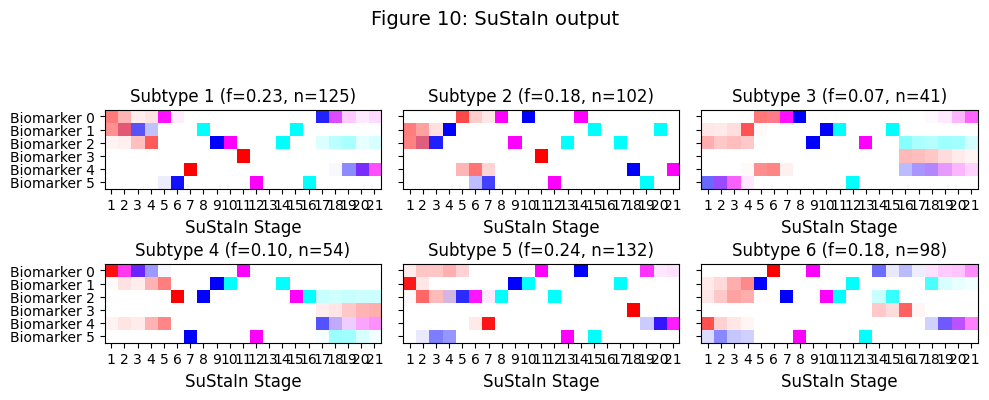

In [17]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pySuStaIn import ZscoreSustain

# 1) Define your Z-score grid
Z_vals = np.array([
    [0, 1, 2, 4, 7, 0],
    [0, 1, 4,11,15,15],
    [0, 1, 4, 7,11,15],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 4, 7, 0, 0],
    [0, 4, 7,15, 0, 0]
])
Z_max = np.array([23, 62, 24, 3, 13, 64])
s=5
# 2) Load your SuStaIn output (samples_sequence, samples_f, etc.)
with open(output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle', "rb") as f:
    data = pickle.load(f)
samples_sequence = data["samples_sequence"]   # shape (n_subtypes, n_events, n_samples)
samples_f        = data["samples_f"]          # shape (n_subtypes,)
n_samples        = M         # or however you stored M

# 3) Plot using the static method, passing Z_vals by name
figs, axs = ZscoreSustain.plot_positional_var(
    samples_sequence=samples_sequence,
    samples_f=samples_f,
    n_samples=n_samples,
    Z_vals=Z_vals,
    subtype_order=tuple(range(6)),      # or whatever order you prefer
    biomarker_labels=None,     # you can supply your own labels here
    stage_label="SuStaIn Stage",
    title_font_size=12,
    stage_font_size=10,
    label_font_size=10,
    stage_interval=1,
    cmap="original",
    figsize=(10, 4)
)

# 4) Add a suptitle and show
plt.suptitle("Figure 10: SuStaIn output", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
